# Introduction to Pandas

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import random

pd.options.display.max_rows = 8

## 1. Pandas: data analysis with python

For data-intensive work in Python the [Pandas](http://pandas.pydata.org) library is very useful.

What is `pandas`?

* Pandas can be thought of as *NumPy arrays with labels* for rows and columns, and better support for heterogenous data types, but it's also a lot more than that.
* Pandas can also be thought of as `R`'s `data.frame` in Python.
* Powerful for working with missing daa, working with time series data, for reading and writing your data, for reshaping, grouping, merging data, and a lot more..

Documentation is available [here](http://pandas.pydata.org/pandas-docs/stable/).

** When do you need pandas? **

When working with __tabular or structured data__ (like R dataframe, SQL table, Excel spreadsheet, ...):

- Import data
- Clean up messy data
- Explore data, gain insight into data
- Process and prepare your data for analysis
- Analyse your data (together with `scikit-learn`, `statsmodels`,...)

<div class="alert alert-block alert-warning">
    
<b> ATTENTION!</b> <br> </br>

Pandas is great for working with heterogenous and tabular 1D/2D data, but not all types of data fit in such structures!
<ul>
    <li>When working with array data (e.g. images, numerical algorithms), just stick to NumPy</li>
    <li>When working with multidimensional labeled data (e.g. climate data, bioinformatisc, engineering, finance): have a look at [xarray](http://xarray.pydata.org/en/stable/)</li>
</ul>
</div>

## 2. Data Structures: `DataFrame` and `Series`

A `DataFrame` is a __tabular data structure__ (multi-dimensional object to hold labeled data) consisting of rows and columns, akin to a spreadsheet, database table or `R`'s `data.frame` object.

For demonstration, I will be using the **Titanic Survival Data** dataset from [Kaggle](http://www.kaggle.com). You can download the data files from [here](https://www.kaggle.com/c/titanic/data).

In [2]:
df = pd.read_csv("../data/titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Attributes of the DataFrame

A DataFrame has besides an `index` attribute, also a `columns` attribute:

In [4]:
df.index

RangeIndex(start=0, stop=891, step=1)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

An overview of that information can be given using `info()` method.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


Also a DataFrame has a `values` attribute.

In [7]:
df.values

array([[1, 0, 3, ..., 7.25, nan, 'S'],
       [2, 1, 1, ..., 71.2833, 'C85', 'C'],
       [3, 1, 3, ..., 7.925, nan, 'S'],
       ...,
       [889, 0, 3, ..., 23.45, nan, 'S'],
       [890, 1, 1, ..., 30.0, 'C148', 'C'],
       [891, 0, 3, ..., 7.75, nan, 'Q']], dtype=object)

Apart from importing your data from an external source (text file, excel, database, ...) one of the most common ways of creating a dataframe is from a dictionary of arrays or lists.

Note that in the IPython notebook, the dataframe will display in a rich HTML view:

In [8]:
data = {'country': ['Belgium', 'France', 'India', 'United States of America'],
        'population (in M)': [11.3, 64.3, 135.26, 32.82],
        'area': [30510, 671308, 357050, 41526],
        'capital': ['Brussels', 'Paris', 'New Delhi', 'Washington DC']}
df_countries = pd.DataFrame(data)
df_countries

,country,population (in M),area,capital
0,Belgium,11.30,30510,Brussels
1,France,64.30,671308,Paris
2,India,135.26,357050,New Delhi
3,United States of America,32.82,41526,Washington DC


### One-dimensional data: `Series` (a column of a DataFrame)

A Series is a basic holder for **one-dimensional labled data**.

In [9]:
df['Age']

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
age = df['Age']
age

0      22.0
1      38.0
2      26.0
3      35.0
       ... 
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

### Attributes of a Series: `index` and `values`

The Series has also an `index` and `values` attribute, but no `columns`.

In [11]:
age.index

RangeIndex(start=0, stop=891, step=1)

In [12]:
age.values[:10]

array([22., 38., 26., 35., 35., nan, 54.,  2., 27., 14.])

We can access series values via the index, just like for NumPy arrays:

In [13]:
age[0]

22.0

Unlike the NumPy array, though, this index can be something other than integers:

In [14]:
df = df.set_index('Name')
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,female,35.0,1,0,113803,53.1000,C123,S
...,...,...,...,...,...,...,...,...,...,...,...
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.0000,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.0000,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.7500,NaN,Q


In [15]:
age = df['Age']
age['Dooley, Mr. Patrick']

32.0

but with the power of numpy arrays. Many things you can do with numpy arrays, can also be applied on DataFrames / Series.

E.g. element-wise operations:

In [16]:
age.mean()

29.69911764705882

Fancy indexing, like indexing with a list or boolean indexing:

In [17]:
age[age > 70]

Name
Goldschmidt, Mr. George B               71.0
Connors, Mr. Patrick                    70.5
Artagaveytia, Mr. Ramon                 71.0
Barkworth, Mr. Algernon Henry Wilson    80.0
Svensson, Mr. Johan                     74.0
Name: Age, dtype: float64

<div class="alert alert-block alert-success">
  
<b> EXCERCISE 1</b>

<ul>
    <li> What is the maximum Fare that was paid? And the median? </li>
</ul>
   
</div>

<div class="alert alert-block alert-success">
   
<b>EXCERCISE 2</b>   

<ul>
    <li> Calculate the average survival ratio for all passengers ('Survival' column indicates whether someone survived(=1) or not(=0).</li>
</ul>
   
</div>

## 3. Data import and export

A wide range of input/output formats are natively supported by pandas:

* CSV, text
* SQL database
* Excel
* HDF5
* json
* html
* pickle
* sas, state

## 4. Exploration

`head()` and `tail()` are two useful methods.

In [18]:
df.head(n=3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
"Heikkinen, Miss. Laina",3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [19]:
df.tail(n=4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Graham, Miss. Margaret Edith",888,1,1,female,19.0,0,0,112053,30.00,B42,S
"Johnston, Miss. Catherine Helen ""Carrie""",889,0,3,female,NaN,1,2,W./C. 6607,23.45,NaN,S
"Behr, Mr. Karl Howell",890,1,1,male,26.0,0,0,111369,30.00,C148,C
"Dooley, Mr. Patrick",891,0,3,male,32.0,0,0,370376,7.75,NaN,Q


Quickly visualizing the data.

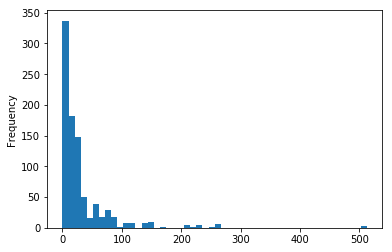

In [20]:
df['Fare'].plot(kind='hist', bins=50)

Missing values

In [21]:
len(df['Age'].isnull())

891

Impute missing values with mean age.

In [22]:
mean_age = df['Age'].mean()
age = int(mean_age)
df['Age'].fillna(age,inplace=True)

In [23]:
age = df['Age']
age.mean()

29.56023569023569

Fill missing values in **Embarked** column to **Unknown**.

In [24]:
df['Embarked'].fillna('Unknown',inplace=True)

Fill missing values in **Cabin** column to **NaN**.

In [25]:
df['Cabin'].fillna('NaN',inplace=True)

Categorize Embarked to numeric variable

In [26]:
df['Embarked'] = df['Embarked'].map({'S':1, 'C':2, 'Q':3, 'Unknown':0}).astype(int)
df['Embarked']

Name
Braund, Mr. Owen Harris                                1
Cumings, Mrs. John Bradley (Florence Briggs Thayer)    2
Heikkinen, Miss. Laina                                 1
Futrelle, Mrs. Jacques Heath (Lily May Peel)           1
                                                      ..
Graham, Miss. Margaret Edith                           1
Johnston, Miss. Catherine Helen "Carrie"               1
Behr, Mr. Karl Howell                                  2
Dooley, Mr. Patrick                                    3
Name: Embarked, Length: 891, dtype: int32

Categorize sex to numeric variable.

In [27]:
df['Sex'].replace(['male','female'],[0,1],inplace=True)

In [28]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
"Braund, Mr. Owen Harris",1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,2
"Heikkinen, Miss. Laina",3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",4,1,1,1,35.0,1,0,113803,53.1000,C123,1
"Allen, Mr. William Henry",5,0,3,0,35.0,0,0,373450,8.0500,NaN,1


<div class="alert alert-block alert-success">

<b> EXCERCISE 3</b>

<ul>
    <li> Count the total number of survived and not surived people and store into a new DataFrame. </li>
    <li> Set names of passengers as the index to this new DataFrame. </li>
</ul>

</div>

New columns can be added to existing DataFrames as well. 

For example, let us calculate the family size of each passenger from the **Sibsp** and **parch** columns. These columns are described as follows:

* **Sibsp**: # of siblings / spouses aboard the Titanic
* **Parch**: # of parents / children aboard the Titanic

Let us also keep a column **IsAlone** if the passenger was traveling alone onboard.

In [29]:
df['Family_Size'] = 0
df['Family_Size'] = df['SibSp'] + df['Parch']
df['IsAlone'] = 0
df.loc[(df['Family_Size'] == 1),'IsAlone'] = 1
df.loc[(df['Family_Size'] == 0) | (df['Family_Size'] > 1), 'IsAlone'] = 0

In [30]:
len(df[df['IsAlone'] == 0])

891

<div class="alert alert-warning">
<b> NOTE: </b>
<ul>
  <li> .loc: It is primarily label based, but may also be used with a boolean array. .loc will raise KeyError when the items are not found. </li>
  <li> .iloc: It is primarily integer position based (from 0 to length-1 of the axis), but may also be used with a boolean array. .iloc will raise IndexError if a requested indexer is out-of-bounds</li>
</ul>

</div>

In [3]:
df_x = pd.DataFrame({'x': [1, 2, 3], 'y': [3, 4, 5], 'z': [6,7,8]})
df_x

,x,y,z
0,1,3,6
1,2,4,7
2,3,5,8


In [6]:
df_x[['x','z']]

,x,z
0,1,6
1,2,7
2,3,8


In [32]:
df_x.iloc[1] = {'x': 9, 'y': 101}
df_x

,x,y
0,1,3
1,9,101
2,3,5


In [33]:
df_x['Name'] = ['A', 'B', 'C']
df_x

,x,y,Name
0,1,3,A
1,9,101,B
2,3,5,C


In [34]:
# Create a new DataFrame
df_y = pd.DataFrame(list('abcde'), index=[0, 3, 2, 5, 4])

In [35]:
df_y

,0
0,a
3,b
2,c
5,d
4,e


In [36]:
df_y.loc[[0,3,5]]

,0
0,a
3,b
5,d


## Different ways to iterate over rows in `DataFrame`


### Method 1: Using **index** attribute of DataFrame

In [37]:
data = {'Name': ['Smith','Amit','John','Clark'],
       'Age': [21, 19, 20, 18],
       'Stream': ['Math', 'Commerce', 'Arts', 'Biology'],
       'Percentage': [88, 92, 95, 70]}

# Convert to dataframe.
df = pd.DataFrame(data, columns=['Name','Age','Stream','Percentage'])

df

,Name,Age,Stream,Percentage
0,Smith,21,Math,88
1,Amit,19,Commerce,92
2,John,20,Arts,95
3,Clark,18,Biology,70


In [38]:
for ind in df.index:
    print(df['Name'][ind], df['Stream'][ind])

Smith Math
Amit Commerce
John Arts
Clark Biology


### Method 2: Using **loc[]**.

In [39]:
for i in range(len(df)):
    print(df.loc[i, "Name"], df.loc[i, "Age"])

Smith 21
Amit 19
John 20
Clark 18


### Method 3: Using **iloc()** function.

In [40]:
for i in range(len(df)):
    print(df.iloc[i, 0], df.iloc[i, 1])

Smith 21
Amit 19
John 20
Clark 18


### Method 4: Using **iterrows()** function.

In [41]:
for index, row in df.iterrows():
    print(row['Name'], row['Age'])

Smith 21
Amit 19
John 20
Clark 18


### Method 5: Using **itertuples()** method.

In [42]:
for row in df.itertuples(index=True, name='Pandas'):
    print(getattr(row, 'Name'), getattr(row, 'Percentage'))

Smith 88
Amit 92
John 95
Clark 70


### Method 6: Using **apply()** method.

In [43]:
df.apply(lambda row: row["Name"] + " " + str(row["Percentage"]), axis=1)

0    Smith 88
1     Amit 92
2     John 95
3    Clark 70
dtype: object

## DataFrame `apply()` function

`pd.apply()` function allows users to pass a function and apply it on every single value of the Pandas series. This comes with a huge improvement over procedural methods(like loops), as this function helps to segregate data according to conditions required due to which it is efficiently used in Data Science.

Following is a small demo to capitalize first letter of a column of names.

In [10]:
df = pd.DataFrame({'A': ['john', 'bODAY', 'minA', 'Peter', 'nicky'], 
                  'B': ['masters', 'graduate', 'graduate', 
                                   'Masters', 'Graduate'], 
                  'C': [27, 23, 21, 23, 24]}) 
df

,A,B,C
0,john,masters,27
1,bODAY,graduate,23
2,minA,graduate,21
3,Peter,Masters,23
4,nicky,Graduate,24


In [11]:
df['A'].apply(lambda x: x.capitalize()) # make the first character have upper case and the rest lower case.

0     John
1    Boday
2     Mina
3    Peter
4    Nicky
Name: A, dtype: object

## Series `map()` function

`pd.map()` is used to map values from two series having one column same. For mapping two series, the last column of the first series should be same as index column of the second series, also the values should be unique. **`map()` function only works on Series, not DataFrame.**

In [13]:
df['A'] = df['A'].map(str.capitalize)
df

,A,B,C
0,John,masters,27
1,Boday,graduate,23
2,Mina,graduate,21
3,Peter,Masters,23
4,Nicky,Graduate,24


## DataFrame `applymap()` function

`pd.applymap()` is used to apply a function to a Dataframe elementwise.

In [62]:
df = pd.DataFrame([[random.randint(10), random.randint(10)], [random.randint(10),random.randint(10)]])
df

,0,1
0,7,0
1,0,9


In [63]:
df.applymap(lambda x: x**2) # much slower than df ** 2

,0,1
0,49,0
1,0,81


<div class="alert alert-block alert-success">

<b> EXCERCISE 4: DATAFRAME </b>

  <ol>
    <li> Write a program to reindex a single row or multiple rows by using the <font face="Monospace">reindex()</font> method. Default values in the new index that are not present in the dataframe are assigned NaN.</li>
    <li> Write a program to create a pandas dataframe from list of dicts. </li>
    <li> Write a program to replace values in dataframe using regex. Suppose you are given a dataframe which contains the details of various events in different cities. For those cities which starts with keyword 'New' or 'new', change it to 'New_'. <code style="background:white;color:black">Refer to Solutions for details. </code> </li>
  </ol>
  
</div>

### Solutions

In [49]:
# column=['a','b','c','d','e'] 
# index=['A','B','C','D','E'] 
  
# # create a dataframe of random values of array 
# df1 = pd.DataFrame(np.random.rand(5,5),  
#             columns=column, index=index) 

# print('\n\nDataframe after reindexing rows: \n',  
# df1.reindex(['B', 'D', 'A', 'C', 'E']))  

In [50]:
# data = [{'Geeks': 'dataframe', 'For': 'using', 'geeks': 'list'}, 
#         {'Geeks':10, 'For': 20, 'geeks': 30}]  
    
# # Creates DataFrame.  
# df = pd.DataFrame(data) 

In [51]:
# Define a dictionary containing employee data 
# data = {'Name':['Jai', 'Princi', 'Gaurav', 'Anuj', 'Geeku'], 
#         'Age':[27, 24, 22, 32, 15], 
#         'Address':['Delhi', 'Kanpur', 'Allahabad', 'Kannauj', 'Noida'], 
#         'Qualification':['Msc', 'MA', 'MCA', 'Phd', '10th'] } 
  
# index = {'a', 'b', 'c', 'd', 'e'} 
  
# # Convert the dictionary into DataFrame  
# df = pd.DataFrame(data, index) 
  
# # Make Own Index as index 
# # In this case default index is exist  
# df.reset_index(inplace = True) 
# df

In [52]:
# Replace values in dataframe using regex

# df = pd.DataFrame({'City':['New York', 'Parague', 'New Delhi', 'Venice', 'new Orleans'], 
#                     'Event':['Music', 'Poetry', 'Theatre', 'Comedy', 'Tech_Summit'], 
#                     'Cost':[10000, 5000, 15000, 2000, 12000]}) 

# df_updated = df.replace(to_replace='[nN]ew', value='New_', regex=True)
# df_updated